# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.ticker as ticker
from scipy.stats import f_oneway
from scipy.stats import f

# Upload data

In [2]:
cars = pd.read_csv('used_cars_cleaned.csv')
cars.head()

,brand,base_model,trim,model_year,mileage,engine_type,fuel_type,horsepower,engine_size,ext_col,transmission_type,number_of_speeds,dual_shift_mode,int_col,accident_damage_reported,clean_title,price
0,Ford,Utility Police,Interceptor Base,2013,51000,V6 Cylinder Engine,Flex Fuel Capability,300,3.7,Black,A/T,6,0,Black,1,1,10300
1,INFINITI,Q50 Hybrid,Sport,2015,88900,V6 Cylinder Engine,Gas/Electric Hybrid,354,3.5,Black,A/T,7,0,Black,0,1,15500
2,Audi,S3 2,.0T Premium Plus,2017,84000,4 Cylinder Engine,Gasoline Fuel,292,2.0,Blue,A/T,6,0,Black,0,1,31000
3,BMW,740 Il,NaN,2001,242000,8 Cylinder Engine,Gasoline Fuel,282,4.4,Green,A/T,Unknown,0,Green,0,1,7300
4,Lexus,Rc 350,F Sport,2021,23436,V6 Cylinder Engine,Gasoline Fuel,311,3.5,Black,A/T,6,0,Black,0,1,41927


In [3]:
cars.dtypes

brand                        object
base_model                   object
trim                         object
model_year                    int64
mileage                       int64
engine_type                  object
fuel_type                    object
horsepower                    int64
engine_size                 float64
ext_col                      object
transmission_type            object
number_of_speeds             object
dual_shift_mode               int64
int_col                      object
accident_damage_reported     object
clean_title                  object
price                         int64
dtype: object

The dtype conversions at the end of the last file did not carry over:

In [4]:
for col in cars:
    if cars[col].dtype not in ['int64', 'float64']:
        cars[col] = cars[col].astype('category')

In [5]:
cars['dual_shift_mode'] = cars['dual_shift_mode'].astype('category')

In [6]:
cars.dtypes

brand                       category
base_model                  category
trim                        category
model_year                     int64
mileage                        int64
engine_type                 category
fuel_type                   category
horsepower                     int64
engine_size                  float64
ext_col                     category
transmission_type           category
number_of_speeds            category
dual_shift_mode             category
int_col                     category
accident_damage_reported    category
clean_title                 category
price                          int64
dtype: object

In [7]:
#Function to separate categorical and numerical dtypes into separate lists
def dtype_lists(df):
    cats = []
    nums = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            nums.append(col)
        else:
            cats.append(col)
    return cats, nums

In [8]:
cats, nums = dtype_lists(cars)

## Visualizations

### Numeric Columns

In [9]:
#Disable scientific notation for plotting purposes
pd.options.display.float_format = '{:, .2f}'.format

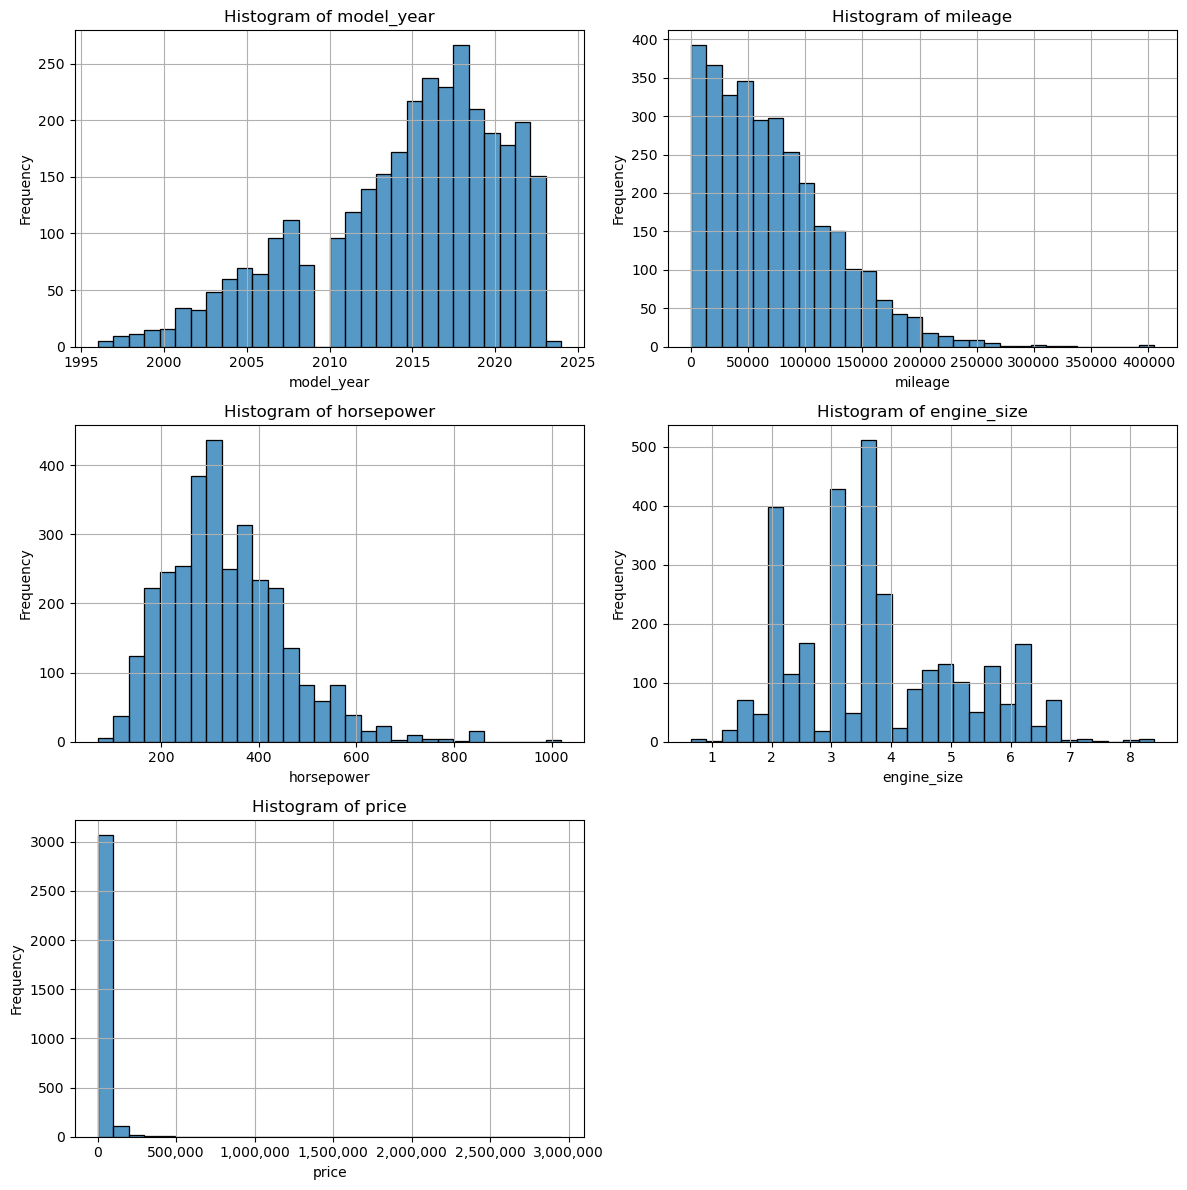

In [10]:
#Instantiate the number of numerical columns
num_cols = len(nums)

#Create grid: 3 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12,12))

#Flatten axes for indexing purposes
axes = axes.flatten()

#Iterate over columns and plot using histograms
for idx, col in enumerate(nums):
    sns.histplot(cars[col], bins=30, ax=axes[idx])
    axes[idx].set_title(f"Histogram of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True)
    if col == 'price':
        axes[idx].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

#Turn off unused subplots
for i in range(len(nums), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Numerical Histogram Analysis

•The model year is skewed to relatively newer vehicles. This makes sense, although there is a curious lack of model_year 2009 cars.

•The vast majority of cars have fewer than 100,000 miles. Again, this makes sense given the kinds of cars typically found at used car lots.

•There appear to be a few outliers in the horsepower column that skew the data.

•Engine size is similar to horsepower. There is likely a strong correlation between the two.

•Because of one large outlier, the histogram for price is basically useless. Let's do it again and omit the maximum price.

In [11]:
#Revised 'price' histogram
cars['price'].max()

2954083

In [12]:
price_revised = cars[cars['price'] < 2954083]

In [13]:
price_revised['price'].max()

1599000

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

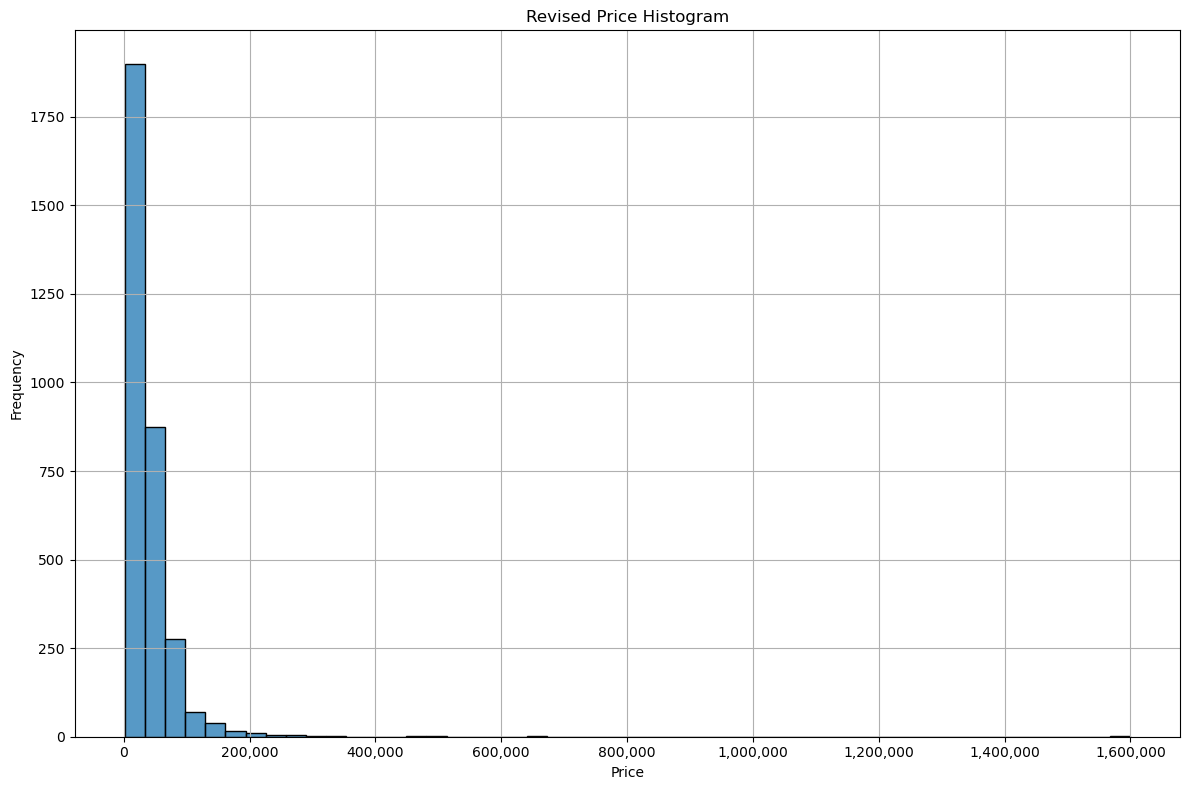

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

#Set histogram
sns.histplot(price_revised['price'], bins=50, ax=ax)

#Set labels
ax.set_title("Revised Price Histogram")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

#Format x-axis for standard notation
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

#Add grid for readability
ax.grid(True)

plt.tight_layout()
plt.show()

That still doesn't give me a great idea of the distribution because of a small number of highly valued cars. 

In [16]:
len(cars[cars['price'] > 400000])

6

I will filter out the 6 values over 400000 and try the visualization again.

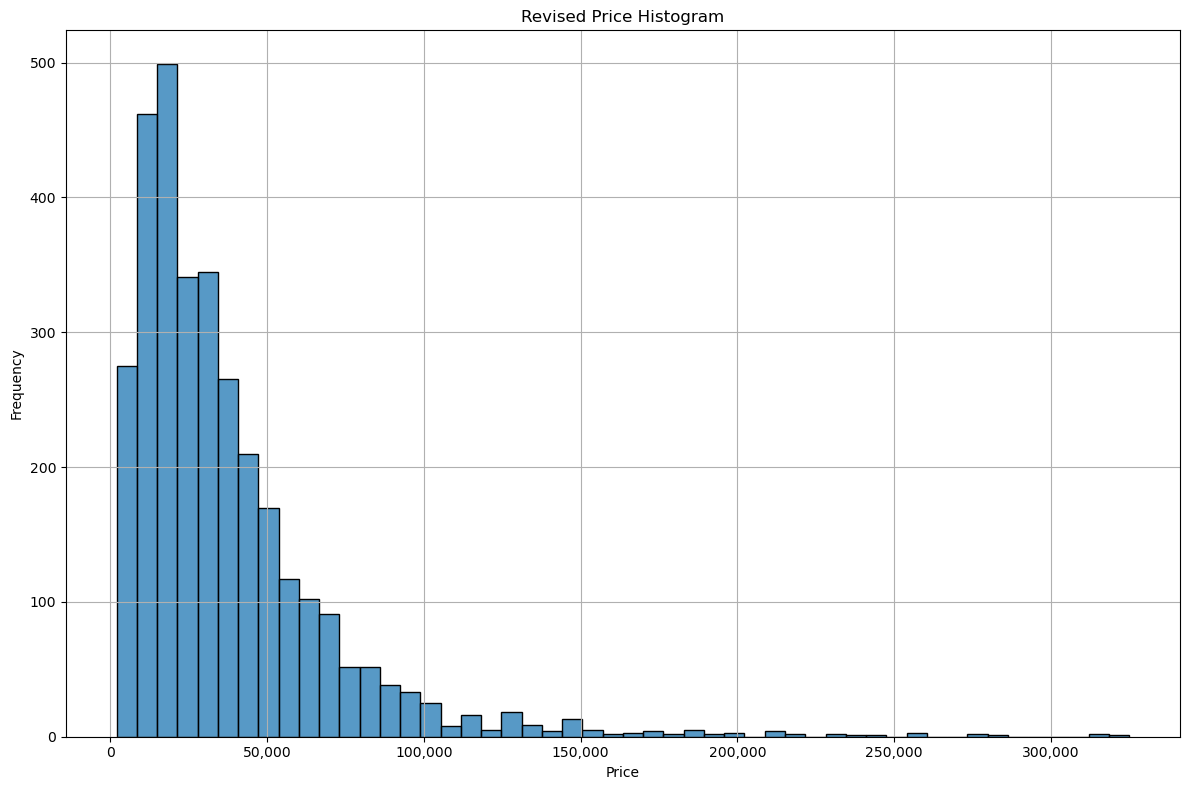

In [17]:
#Filter out cars priced over 400000
price_revised_b = cars[cars['price'] < 400000]

#Run the visualization again:
fig, ax = plt.subplots(figsize=(12, 8))

#Set histogram
sns.histplot(price_revised_b['price'], bins=50, ax=ax)

#Set labels
ax.set_title("Revised Price Histogram")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

#Format x-axis for standard notation
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

#Add grid for readability
ax.grid(True)

plt.tight_layout()
plt.show()

The vast majority of cars are still priced under 100000. Most cars are less than 50000. 

I'm curious which cars are priced over 100000. Might these be outliers or should they be kept for analysis?

In [18]:
high_value = cars[cars['price'] > 100000]

In [19]:
high_value['brand'].value_counts()

brand
Porsche          38
Mercedes-Benz    23
Lamborghini      12
Land             10
Bentley           9
BMW               7
Ferrari           7
Lexus             4
Audi              4
Cadillac          4
Dodge             4
Nissan            3
Rolls-Royce       3
McLaren           3
Chevrolet         3
Aston             2
Lucid             1
Maserati          1
Mitsubishi        0
Plymouth          0
Mercury           0
Pontiac           0
Acura             0
RAM               0
Rivian            0
Saab              0
Scion             0
Subaru            0
Suzuki            0
Tesla             0
Toyota            0
Volkswagen        0
Volvo             0
Saturn            0
Lincoln           0
Mazda             0
Maybach           0
Buick             0
Chrysler          0
FIAT              0
Ford              0
GMC               0
Genesis           0
Honda             0
Hummer            0
Hyundai           0
INFINITI          0
Jaguar            0
Jeep              0
Karma         

With brands like Porsche, Mercedes, and Lambourghini, it's probably best to leave these for analysis. It seems that brand name may be a significant indicator of price.

## Categorical analysis

Several of the categorical columns have large numbers of unique values. To make the plots more readable, I will create a function to 
limit the number of values in the plot to the top 10 most common and combine the remaining columns into an "Other" value before creating the for loop to visualize the code.

In [20]:
# Function to plot countplots for categorical columns in a grid
def plot_countplots_grid(df, cats, top_n=10, rows=6, cols=2):
    # Determine the total number of plots
    num_plots = len(cats)

    # Create the grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(16, 24))
    axes = axes.flatten()  # Flatten the axes for easier indexing

    for idx, col in enumerate(cats):
        # Group rare categories into "Other"
        value_counts = df[col].value_counts()
        if len(value_counts) > top_n:
            df[f'{col}_grouped'] = df[col].apply(lambda x: x if value_counts[x] >= value_counts.nlargest(top_n).min() else 'Other')
        else:
            df[f'{col}_grouped'] = df[col]

        # Plot the countplot on the corresponding subplot
        sns.countplot(
            data=df,
            x=f'{col}_grouped',
            hue=f'{col}_grouped',
            order=df[f'{col}_grouped'].value_counts().index,
            palette='viridis',
            legend=False,
            ax=axes[idx],
        )
        axes[idx].set_title(f'Countplot of {col}', fontsize=14)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel("Count", fontsize=12)
        axes[idx].tick_params(axis='x', rotation=45)

    # Turn off unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

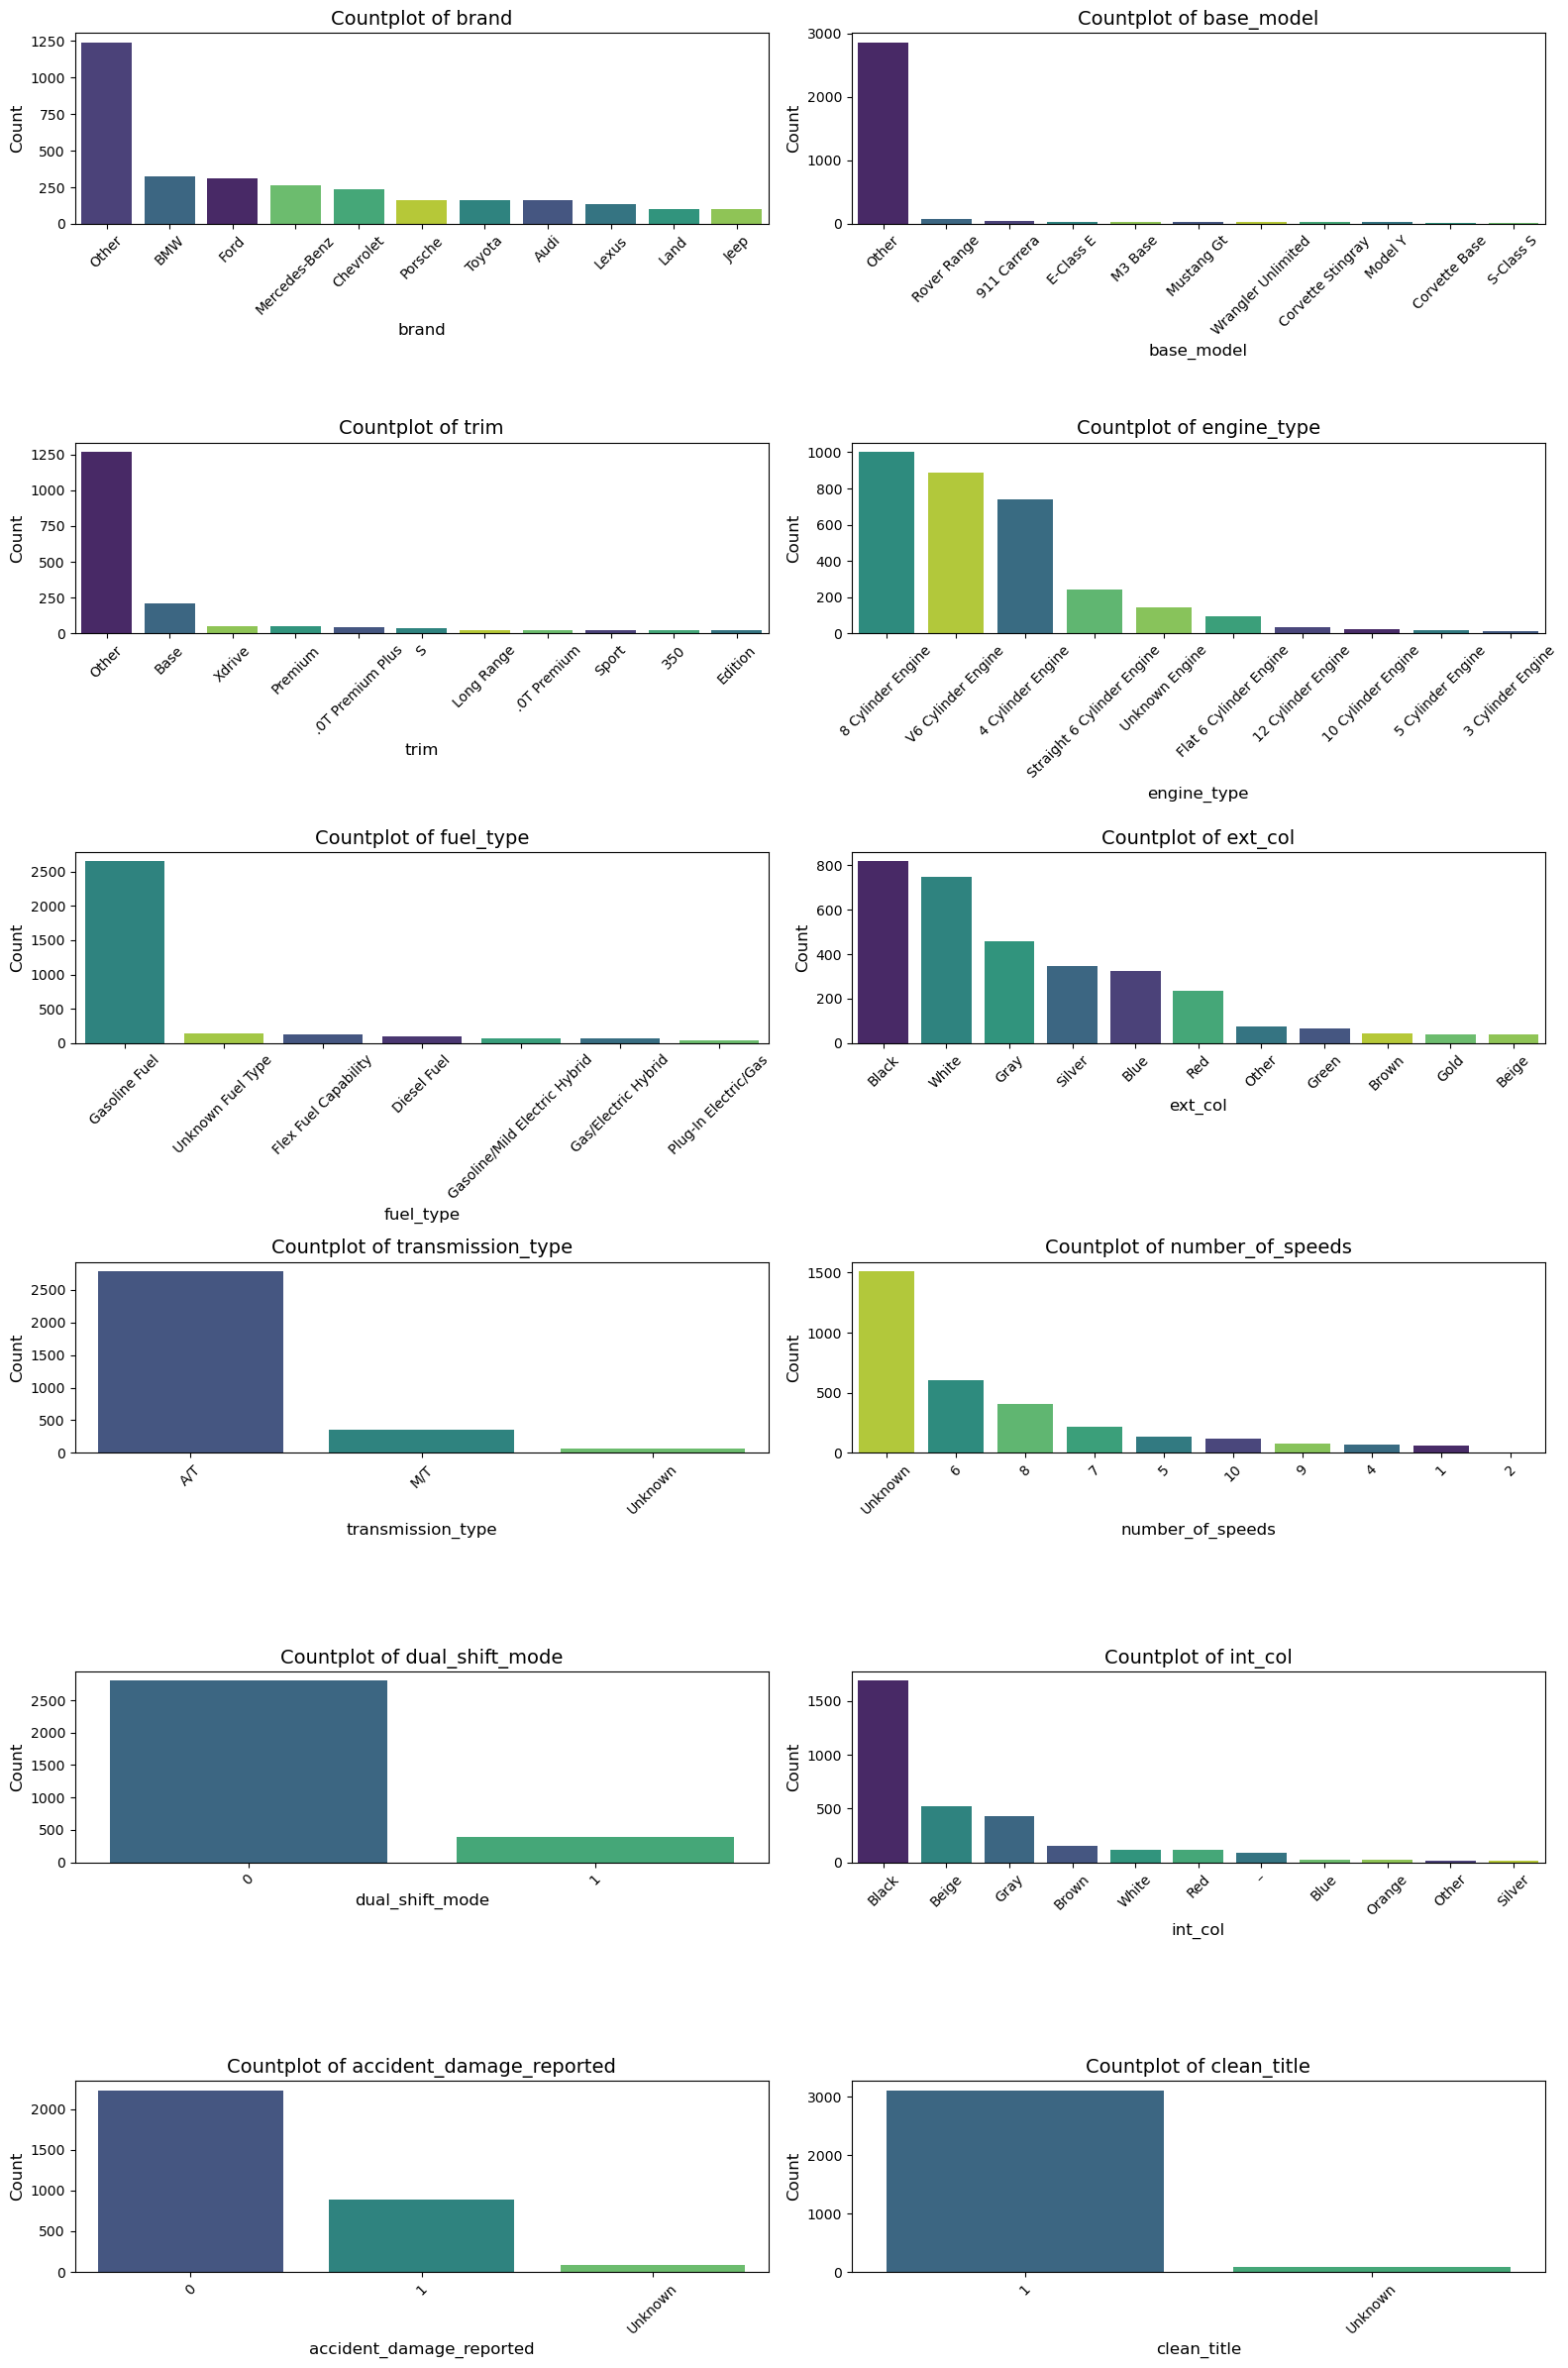

In [21]:
plot_countplots_grid(cars, cats, top_n=10, rows=6, cols=2)

In [22]:
#How many unique brands? 'Other' doesn't appear helpful
cars['brand'].unique()

['Ford', 'INFINITI', 'Audi', 'BMW', 'Lexus', ..., 'Mercury', 'Plymouth', 'smart', 'Maybach', 'Suzuki']
Length: 55
Categories (55, object): ['Acura', 'Alfa', 'Aston', 'Audi', ..., 'Toyota', 'Volkswagen', 'Volvo', 'smart']

### Categorical Visualization Analysis

•<b>Countplot of brand</b>-- 'Other' was not much help. There are 55 total brands in the dataset. But, the visualization did show that BMW, Ford, Mercedes, and Chevrolet are the most common brands in the data set.

•<b>Countplot of base model</b>-- Completely unhelpful. It's likely significant when considered <i>with</i> brand, but not independently.

•<b>Countplot of trim</b>-- Same as base model.

•<b>Countplot of engine type</b>-- The dataset contains many more traditional 8, 6, and 4 cylinder engines than other types.

•<b>Countplot of fuel type</b>-- The dataset contains a vast majority of vehicles that run on gasoline only.

•<b>Countplot of exterior color</b>-- Black and white are far and away the most common exterior colors in the dataset.

•<b>Countplot of transmission type</b>-- Automatic transmissions are by far the most common transmission type in the dataset.

•<b>Countplot of number of speeds</b>-- 'Unknown' is the largest value by a significant margin. It's likely this column will be dropped, but I would like to see the correlation between known speeds and price first.

•<b>Countplot of dual shift mode</b>-- A 0 value here represents 'False', so most cars do not have dual shift mode. It appears unlikely this value will be a significant predictor of price, but I will withold judgment until a correlation matrix is run.

•<b>Countplot of interior color</b>-- Black is the most common by far.

•<b>Countplot of accident or damage reported</b>-- 'False' = 0, so most vehicles do not have damage reported. There are not many 'Unknown' values in comparison to the total number of rows.

•<b>Clean title countplot</b>-- The vast majority of vehicles have clean titles.

## Correlation matrix

In [23]:
#Correlation between numeric columns
cars.corr(numeric_only=True)

,model_year,mileage,horsepower,engine_size,price
model_year,1.00,-0.59,0.31,-0.11,0.21
mileage,-0.59,1.00,-0.35,0.06,-0.30
horsepower,0.31,-0.35,1.00,0.64,0.35
engine_size,-0.11,0.06,0.64,1.00,0.14
price,0.21,-0.30,0.35,0.14,1.00


•<b>Horsepower</b>-- Has the strongest positive correlation on price.

•<b>Mileage</b>-- Somewhat of a significant negative correlation on price.

•<b>Model year</b>-- Mildly significant positive correlation on price.

### ANOVA analysis for categorical columns

In [24]:
#Create ANOVA dictionary
anova_results = {}
for col in cats:
    #Group prices by category
    groups = [cars.loc[cars[col] == category, 'price'] for category in cars[col].unique()]
    #Filter out groups with fewer than 2 data points
    valid_groups = [group for group in groups if len(group) > 1]

    #Perform ANOVA if there are at least 2 valid groups
    if len(valid_groups) > 1:
        f_stat, p_value = f_oneway(*valid_groups)
        anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}
    else: #Skip invalid groups
        anova_results[col] = {'F-statistic': None, 'p-value': None}

#Convert results to a DataFrame
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values(by='F-statistic', ascending=False, inplace=True)

In [25]:
#Create a loop to iterate over ANOVA results and store statistically significant values

#Instantiate statistically significant threshold
p_value_threshold = 0.05

#Instantiate list to store statistically significant columns
significant_results = []

#Iterate over rows
for col, stats in anova_results.items():
    if stats['p-value'] < p_value_threshold:
        significant_results.append((col, stats['F-statistic'], stats['p-value']))

#Print the significant results
print("Statistically significant results")
for col, f_stat, p_value in significant_results:
    print(f"{col}: F-statistic={f_stat:.4f}, p-value={p_value:.4e}")

Statistically significant results
brand: F-statistic=9.9960, p-value=4.1437e-69
base_model: F-statistic=2.7240, p-value=1.5168e-59
engine_type: F-statistic=32.8101, p-value=1.1983e-55
fuel_type: F-statistic=5.2928, p-value=1.9299e-05
number_of_speeds: F-statistic=7.5481, p-value=5.1546e-11
dual_shift_mode: F-statistic=23.5400, p-value=1.2819e-06
int_col: F-statistic=3.0738, p-value=2.4690e-04
accident_damage_reported: F-statistic=14.7978, p-value=4.0083e-07


In [26]:
#Create a significant_results DataFrame
significant_results_df = pd.DataFrame(significant_results, columns=['category', 'F_statistic', 'p_value'])

In [27]:
#Sort the DataFrame by F-Statistic then p-value
significant_results_df.sort_values(by=['F_statistic', 'p_value'], ascending=False)

,category,F_statistic,p_value
2,engine_type,32.81,0.00
5,dual_shift_mode,23.54,0.00
7,accident_damage_reported,14.80,0.00
0,brand,10.00,0.00
4,number_of_speeds,7.55,0.00
3,fuel_type,5.29,0.00
6,int_col,3.07,0.00
1,base_model,2.72,0.00


### ANOVA Interpretation

In [30]:
#Set significance level
alpha = 0.05

#Instantiate list to store significant results
significant_results = []

#Iterate through the significant_results_df
for idx, row in significant_results_df.iterrows():
    category = row['category']
    f_stat = row['F_statistic']

    #Degrees of freedom
    k = cars[category].nunique() #Number of unique categories
    N = len(cars[category]) #Total number of samples
    df_1 = k - 1
    df_2 = N - k

    #Calculate critical F-value
    critical_value = f.ppf(1 - alpha, dfn=df_1, dfd=df_2)

    #Determine if significant
    significant = f_stat > critical_value
    significant_results.append((category, f_stat, critical_value, significant))

#Convert results to DataFrame
significance_results_df = pd.DataFrame(significant_results, columns=['Category', 'F_statistic', 'p_value', 'Significant'])

In [32]:
significance_results_df.sort_values(by=['F_statistic'], ascending=False)

,Category,F_statistic,p_value,Significant
2,engine_type,32.81,1.88,True
5,dual_shift_mode,23.54,3.84,True
7,accident_damage_reported,14.80,3.00,True
0,brand,10.00,1.34,True
4,number_of_speeds,7.55,1.88,True
3,fuel_type,5.29,2.10,True
6,int_col,3.07,1.76,True
1,base_model,2.72,1.09,True


According to the F-statistic, all of the categorical columns are statistically significant when predicting the price.

From this level of statistical analysis, it appears the following columns are significant predictors of used car price:

•engine_type

•dual_shift_mode

•accident_damage_reported

•brand

•number_of_speeds

•fuel_type

•int_color

•base_model

•horsepower

•mileage

•model_year

In the next workbook, I will further investigate the significance of predictors as part of my preprocessing process.